<a href="https://colab.research.google.com/github/123hawaa/ML-Project/blob/main/Credit__Risk__Scoring__Projectipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy  as  np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-06-trees/CreditScoring.csv'

In [ ]:
!wget $data

--2021-12-01 07:02:45--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-06-trees/CreditScoring.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182489 (178K) [text/plain]
Saving to: ‘CreditScoring.csv’

CreditScoring.csv   100%[===================>] 178.21K  --.-KB/s    in 0.003s  

2021-12-01 07:02:45 (50.1 MB/s) - ‘CreditScoring.csv’ saved [182489/182489]



In [ ]:
df = pd.read_csv(data)

In [ ]:
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [ ]:
df.columns = df.columns.str.lower()

In [ ]:
df.status.value_counts()

1    3200
2    1254
0       1
Name: status, dtype: int64

In [ ]:
status_value ={
    1 : 'ok',
    2 : 'default',
    0 : 'nknown'

}
df.status = df.status.map(status_value)

In [ ]:
df.status

0            ok
1            ok
2       default
3            ok
4            ok
         ...   
4450    default
4451         ok
4452    default
4453         ok
4454         ok
Name: status, Length: 4455, dtype: object

In [ ]:
home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)

In [ ]:
df

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4450,default,1,rent,60,39,married,no,fixed,69,92,0,0,900,1020
4451,ok,22,owner,60,46,married,no,fixed,60,75,3000,600,950,1263
4452,default,0,owner,24,37,married,no,partime,60,90,3500,0,500,963
4453,ok,0,rent,48,23,single,no,freelance,49,140,0,0,550,550


In [ ]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [ ]:
for c in ['income' , 'assets' , 'debt']:
  df[c] = df[c].replace(to_replace = 99999999 , value = np .nan)

In [ ]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


In [ ]:
df= df[df.status != 'nknown'].reset_index(drop = True)

In [ ]:
df.status.value_counts()

ok         3200
default    1254
Name: status, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
full_train , test = train_test_split(df , test_size = 0.2 , random_state = 11)
df_train , df_val = train_test_split(full_train, test_size = 0.25 , random_state =11)
df_train  = df_train.reset_index(drop= True)
df_val  = df_val.reset_index(drop= True)
test = test.reset_index(drop= True)

In [ ]:
y_train = (df_train.status == 'default').astype('int').values
y_val   = (df_val.status   == 'default').astype('int').values
y_test = (test.status      =='default').astype('int').values

In [ ]:
y_train

array([1, 1, 0, ..., 0, 0, 0])

In [ ]:
del df_train['status']
del df_val['status']
del test['status']



# Decision trees
1-How a decision tree looks like

2-Training a decision tree

3-Overfitting

4-Controlling the size of a tree

In [ ]:
def assess_risk (client):
  if client['records'] == 'yes':
    if client['job'] == 'no':
      return 'default'
    else :
      return 'ok'
  else :
    if client['assets'] > 6000 :
      return 'ok'
    else :
      return 'default'

In [ ]:
x = df_train.iloc[2].to_dict()

In [ ]:
x

{'age': 40,
 'amount': 1320,
 'assets': 0.0,
 'debt': 0.0,
 'expenses': 75,
 'home': 'parents',
 'income': 121.0,
 'job': 'fixed',
 'marital': 'married',
 'price': 1600,
 'records': 'no',
 'seniority': 1,
 'time': 48}

In [ ]:
assess_risk(x)

'default'

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_text

In [ ]:
train_dic = df_train.fillna(0).to_dict(orient = 'records')

In [ ]:
dv = DictVectorizer(sparse= False)
x_train = dv.fit_transform(train_dic)

In [ ]:
model = DecisionTreeClassifier()
model.fit(x_train , y_train)

DecisionTreeClassifier()

In [ ]:
val_dic = df_val.fillna(0).to_dict(orient = 'records')

In [ ]:
x_val = dv.transform(val_dic)

In [ ]:
y_pred = model.predict_proba(x_val)[:,1]

In [ ]:
y_pred

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
       1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
roc_auc_score(y_val , y_pred)

0.6551488217771427

In [ ]:
y_pred2 = model.predict_proba(x_train)[:,1]

In [ ]:
y_pred2

array([1., 1., 0., ..., 0., 0., 0.])

In [ ]:
roc_auc_score(y_train, y_pred2)

1.0

In [ ]:
model = DecisionTreeClassifier(max_depth=3)
model.fit(x_train , y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
y_pred = model.predict_proba(x_val)[:,1]
a=roc_auc_score(y_val , y_pred)
print(a)
y_pred2 = model.predict_proba(x_train)[:,1]
b=roc_auc_score(y_train , y_pred2)
print(b)

0.7389079944782155
0.7761016984958594


In [ ]:
print(export_text(model, feature_names=dv.get_feature_names()))

|--- records=yes <= 0.50
|   |--- job=partime <= 0.50
|   |   |--- income <= 74.50
|   |   |   |--- class: 0
|   |   |--- income >  74.50
|   |   |   |--- class: 0
|   |--- job=partime >  0.50
|   |   |--- assets <= 8750.00
|   |   |   |--- class: 1
|   |   |--- assets >  8750.00
|   |   |   |--- class: 0
|--- records=yes >  0.50
|   |--- seniority <= 6.50
|   |   |--- amount <= 862.50
|   |   |   |--- class: 0
|   |   |--- amount >  862.50
|   |   |   |--- class: 1
|   |--- seniority >  6.50
|   |   |--- income <= 103.50
|   |   |   |--- class: 1
|   |   |--- income >  103.50
|   |   |   |--- class: 0



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# Decision tree learning algorithm
1-Finding the best split for one column

2-Finding the best split for the entire dataset

3-Stopping criteria

4-Decision tree learning algorithm

In [ ]:
data = [
    [8000, 'default'],
    [2000, 'default'],
    [   0, 'default'],
    [5000, 'ok'],
    [5000, 'ok'],
    [4000, 'ok'],
    [9000, 'ok'],
    [3000, 'default'],
]
df_example = pd.DataFrame(data,columns=['assets' , 'status'])

In [ ]:
df_example.sort_values('assets')

,assets,status
2,0,default
1,2000,default
7,3000,default
5,4000,ok
3,5000,ok
4,5000,ok
0,8000,default
6,9000,ok


In [ ]:
from IPython.display import display
t = [0,2000,3000,4000,5000,8000,9000]
for n in t :
   print(n)
   df_left = df_example[df_example.assets <= n]
   df_right = df_example[df_example.assets > n]
   display(df_right)
   print(df_left.status.value_counts(normalize=True))
   display(df_right)
   print(df_right.status.value_counts(normalize=True))
   print()

0


,assets,status
0,8000,default
1,2000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


default    1.0
Name: status, dtype: float64


,assets,status
0,8000,default
1,2000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


ok         0.571429
default    0.428571
Name: status, dtype: float64

2000


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


default    1.0
Name: status, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


ok         0.666667
default    0.333333
Name: status, dtype: float64

3000


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok


default    1.0
Name: status, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok


ok         0.8
default    0.2
Name: status, dtype: float64

4000


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
6,9000,ok


default    0.75
ok         0.25
Name: status, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
6,9000,ok


ok         0.75
default    0.25
Name: status, dtype: float64

5000


,assets,status
0,8000,default
6,9000,ok


default    0.5
ok         0.5
Name: status, dtype: float64


,assets,status
0,8000,default
6,9000,ok


default    0.5
ok         0.5
Name: status, dtype: float64

8000


,assets,status
6,9000,ok


default    0.571429
ok         0.428571
Name: status, dtype: float64


,assets,status
6,9000,ok


ok    1.0
Name: status, dtype: float64

9000


,assets,status


default    0.5
ok         0.5
Name: status, dtype: float64


,assets,status


Series([], Name: status, dtype: float64)



In [ ]:
data = [
    [8000, 3000, 'default'],
    [2000, 1000, 'default'],
    [   0, 1000, 'default'],
    [5000, 1000, 'ok'],
    [5000, 1000, 'ok'],
    [4000, 1000, 'ok'],
    [9000,  500, 'ok'],
    [3000, 2000, 'default'],
]

df_example = pd.DataFrame(data, columns=['assets', 'debt', 'status'])
df_example

,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


In [ ]:
df_example.sort_values('debt')

,assets,debt,status
6,9000,500,ok
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default
0,8000,3000,default


In [ ]:
thresholds = {
    'assets':[0,2000,3000,4000,5000,8000],
    'debt' : [500,1000,2000]
}
for feature, Ts in thresholds.items():
    print('#####################')
    print(feature)
    for T in Ts:
        print(T)
        df_left = df_example[df_example[feature] <= T]
        df_right = df_example[df_example[feature] > T]

        display(df_left)
        print(df_left.status.value_counts(normalize=True))
        display(df_right)
        print(df_right.status.value_counts(normalize=True))

        print()
    print('#####################')

#####################
assets
0


,assets,debt,status
2,0,1000,default


default    1.0
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


ok         0.571429
default    0.428571
Name: status, dtype: float64

2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default


default    1.0
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


ok         0.666667
default    0.333333
Name: status, dtype: float64

3000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
7,3000,2000,default


default    1.0
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


ok         0.8
default    0.2
Name: status, dtype: float64

4000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
5,4000,1000,ok
7,3000,2000,default


default    0.75
ok         0.25
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
6,9000,500,ok


ok         0.75
default    0.25
Name: status, dtype: float64

5000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


default    0.5
ok         0.5
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
6,9000,500,ok


default    0.5
ok         0.5
Name: status, dtype: float64

8000


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


default    0.571429
ok         0.428571
Name: status, dtype: float64


,assets,debt,status
6,9000,500,ok


ok    1.0
Name: status, dtype: float64

#####################
#####################
debt
500


,assets,debt,status
6,9000,500,ok


ok    1.0
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


default    0.571429
ok         0.428571
Name: status, dtype: float64

1000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


ok         0.666667
default    0.333333
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
7,3000,2000,default


default    1.0
Name: status, dtype: float64

2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


ok         0.571429
default    0.428571
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default


default    1.0
Name: status, dtype: float64

#####################


#Decision trees parameter tuning
1-selecting max_depth

2-selecting min_samples_leaf

In [ ]:
threshold = [1,2,3,4,5,6,10,15,20,25,None]
for n in threshold :
    model = DecisionTreeClassifier(max_depth=n)
    model.fit(x_train , y_train)
    y_pred = model.predict_proba(x_val)[:,1]
    auc=roc_auc_score(y_val , y_pred)
    print(auc , n)

0.6058644740984719 1
0.6685264343319367 2
0.7389079944782155 3
0.7612827250490422 4
0.7664957254607541 5
0.7592302196604587 6
0.7004129229129834 10
0.6505776077111235 15
0.6525816763943717 20
0.6570499624615533 25
0.6594384974934006 None


In [ ]:
score= []
for n in [4,5,6]:
  for s in [1, 5, 10, 15, 20, 500, 100, 200]:
    model = DecisionTreeClassifier(max_depth=n,
                                   min_samples_leaf = s )
    model.fit(x_train , y_train)
    y_pred = model.predict_proba(x_val)[:,1]
    auc=roc_auc_score(y_val , y_pred)

    score.append((auc , n ,s))

In [ ]:
col = ['auc' , 'max_depth' , 'min_samples_leaf']
df_score = pd.DataFrame(score ,columns=col)

In [ ]:
df_score

,auc,max_depth,min_samples_leaf
0,0.761283,4,1
1,0.761283,4,5
2,0.761283,4,10
3,0.763726,4,15
4,0.760910,4,20
5,0.679842,4,500
6,0.755937,4,100
7,0.747260,4,200
8,0.766496,5,1
9,0.768173,5,5


In [ ]:
df_score_pivot = df_score.pivot(index='min_samples_leaf' , columns= ['max_depth'],values= ['auc'])

In [ ]:
df_score_pivot.round(3)

auc              
max_depth             4      5      6
min_samples_leaf                     
1                 0.761  0.766  0.752
5                 0.761  0.768  0.760
10                0.761  0.762  0.778
15                0.764  0.772  0.785
20                0.761  0.774  0.774
100               0.756  0.763  0.776
200               0.747  0.759  0.768
500               0.680  0.680  0.680

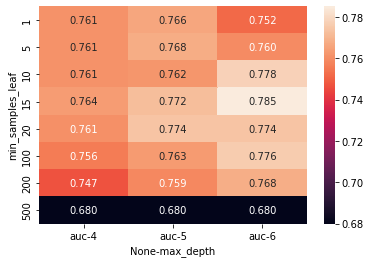

In [ ]:
sns.heatmap(df_score_pivot , annot=True, fmt=".3f")

In [ ]:
  model = DecisionTreeClassifier(max_depth=6,
                                   min_samples_leaf = 15 )


#Ensembles and random forest
1-Board of experts

2-Ensembling models

3-Random forest-ensembling decision trees

4-Tuning random forest

In [ ]:
from sklearn.ensemble import Random